In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import random
from get_smarties import Smarties
%matplotlib inline

data = pd.read_csv('data.csv')
data = data[~data['erro']].copy().drop('erro', axis=1).reset_index(drop=True)


In [5]:
gs = Smarties()
dummie_data = gs.fit_transform(data)
pca = decomposition.PCA(n_components=2)
pca.fit(dummie_data)
X = pca.transform(dummie_data)
X

array([[-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.19601978e+02,  1.12608086e+01],
       [-8.

## DBSCAN

In [6]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

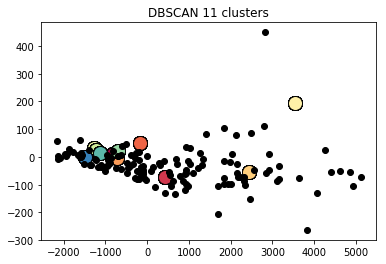

In [7]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN %d clusters' % n_clusters_)
plt.savefig("dbscan.pdf",pad_inches=10)
plt.show()

## KMEANS

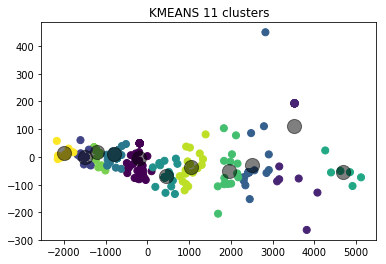

In [8]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('KMEANS %d clusters' % 11)
plt.savefig("kmeans.pdf",pad_inches=10)

In [20]:
sample = data.sample(random_state=99)
idx = sample.index[0]
test = kmeans.predict(X[idx].reshape(1, -1))
dummie = gs.transform(sample)
transformed_dummie = pca.transform(dummie)
resp = kmeans.predict(transformed_dummie)
print('Original',test, '- Dummie', resp)

Original [5] - Dummie [5]
